<a href="https://colab.research.google.com/github/tykimos/Keras/blob/master/pseudo_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
import keras
import numpy as np

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train_label = x_train[0:25000]
x_train_no_label = x_train[25000:50000]
x_val = x_train[50000:60000]

y_train_label = y_train[0:25000]
y_train_no_label = y_train[25000:50000]
y_val = y_train[50000:60000]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [3]:
batch_size = 32

train_label_loss = []
train_label_acc = []
val_loss = []
val_acc = []

for epoch_idx in range(100):

    batch_train_label_loss = []
    batch_train_label_acc = []
    batch_val_loss = []
    batch_val_acc = []

    for i in range(len(x_train_label)//batch_size):
        x_batch = x_train_label[i*batch_size: (i+1)*batch_size]
        y_batch = y_train_label[i*batch_size: (i+1)*batch_size]
        loss, acc = model.train_on_batch(x_batch, y_batch)
        batch_train_label_loss.append(loss)
        batch_train_label_acc.append(acc)

    for i in range(len(x_val)//batch_size):
        x_batch = x_val[i*batch_size: (i+1)*batch_size]
        y_batch = y_val[i*batch_size: (i+1)*batch_size]
        xx = model.test_on_batch(x_batch, y_batch)
        loss, acc = model.test_on_batch(x_batch, y_batch)
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    train_label_loss.append(np.mean(batch_train_label_loss))
    train_label_acc.append(np.mean(batch_train_label_acc))
    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    model.save((str(epoch_idx) + '_model'))

    print('epoch {0:4d} train_label acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch_idx, 
                                                                                                      np.mean(batch_train_label_acc), 
                                                                                                      np.mean(batch_train_label_loss), 
                                                                                                      np.mean(batch_val_acc), 
                                                                                                      np.mean(batch_val_loss)))

epoch    0 train_label acc 0.785 loss 0.612 val acc 0.832 loss 0.481
epoch    1 train_label acc 0.844 loss 0.430 val acc 0.841 loss 0.452
epoch    2 train_label acc 0.856 loss 0.387 val acc 0.846 loss 0.432
epoch    3 train_label acc 0.869 loss 0.355 val acc 0.844 loss 0.428
epoch    4 train_label acc 0.876 loss 0.332 val acc 0.854 loss 0.407
epoch    5 train_label acc 0.883 loss 0.312 val acc 0.853 loss 0.411
epoch    6 train_label acc 0.889 loss 0.296 val acc 0.864 loss 0.390
epoch    7 train_label acc 0.895 loss 0.283 val acc 0.861 loss 0.407
epoch    8 train_label acc 0.899 loss 0.269 val acc 0.863 loss 0.400
epoch    9 train_label acc 0.904 loss 0.259 val acc 0.862 loss 0.415
epoch   10 train_label acc 0.906 loss 0.249 val acc 0.867 loss 0.403
epoch   11 train_label acc 0.909 loss 0.242 val acc 0.867 loss 0.403
epoch   12 train_label acc 0.913 loss 0.230 val acc 0.865 loss 0.435
epoch   13 train_label acc 0.918 loss 0.222 val acc 0.861 loss 0.432
epoch   14 train_label acc 0.920 l

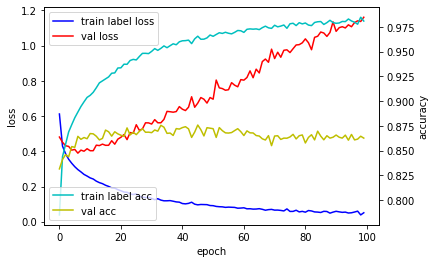

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_label_loss, 'b', label='train label loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_label_acc, 'c', label='train label acc')
acc_ax.plot(val_acc, 'y', label='val acc')

# 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
model = keras.models.load_model('6_model')

train_no_label_loss = []
train_no_label_acc = []
val_loss = []
val_acc = []

for epoch_idx in range(100):

    batch_train_no_label_loss = []
    batch_train_no_label_acc = []
    batch_val_loss = []
    batch_val_acc = []

    for i in range(len(x_train_no_label)//batch_size):
        x_batch = x_train_no_label[i*batch_size: (i+1)*batch_size]
        y_true_batch = y_train_no_label[i*batch_size: (i+1)*batch_size]
        y_pred_batch = model.predict_on_batch(x_batch)
        y_pseudo_batch = np.zeros((batch_size, 10))
        
        for b in range(batch_size):
            ys = y_pred_batch[b]
            y_pseudo_batch[b, np.argmax(ys)] = 1.0

        loss, _ = model.train_on_batch(x_batch, y_pseudo_batch)
        acc = np.mean(np.equal(y_true_batch, y_pseudo_batch))

        batch_train_no_label_loss.append(loss)
        batch_train_no_label_acc.append(acc)

    for i in range(len(x_val)//batch_size):
        x_batch = x_val[i*batch_size: (i+1)*batch_size]
        y_batch = y_val[i*batch_size: (i+1)*batch_size]
        xx = model.test_on_batch(x_batch, y_batch)
        loss, acc = model.test_on_batch(x_batch, y_batch)
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    train_no_label_loss.append(np.mean(batch_train_no_label_loss))
    train_no_label_acc.append(np.mean(batch_train_no_label_acc))
    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    model.save('no_label_' + str(epoch_idx) + '_model')

    print('epoch {0:4d} train no_label acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch_idx,
                                                                                                         np.mean(batch_train_no_label_acc), 
                                                                                                         np.mean(batch_train_no_label_loss), 
                                                                                                         np.mean(batch_val_acc), 
                                                                                                         np.mean(batch_val_loss)))

epoch    0 train no_label acc 0.932 loss 0.040 val acc 0.428 loss 14.550
epoch    1 train no_label acc 0.858 loss 0.014 val acc 0.149 loss 75.294
epoch    2 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 99.275
epoch    3 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 99.424
epoch    4 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 99.580
epoch    5 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 99.750
epoch    6 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 99.924
epoch    7 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 100.297
epoch    8 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 100.690
epoch    9 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 101.209
epoch   10 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 101.888
epoch   11 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 128.368
epoch   12 train no_label acc 0.820 loss 0.000 val acc 0.105 loss 128.369
epoch   13 train no_label acc 0.820 loss 0.00

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_no_label_loss, 'g', label='train no label loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_no_label_acc, 'm', label='train no label acc')
acc_ax.plot(val_acc, 'y', label='val acc')

# 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 73us/step
## evaluation loss and_metrics ##
[5.018894667625427, 0.7681999802589417]


In [ ]:
prob_pred.shape

NameError: ignored

In [ ]:
y = [0.1, 0.3, 0.4, 0.2]
y_pred = np.zeros(4)

In [ ]:
y_pred[np.argmax(y)] = 1.0

In [ ]:
print(y_pred)

In [ ]:
np.mean(np.equal(y_pred, y))